# Results: neural networks and naive Bayes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
DATA_TARGET_DIR = '../data/nn_nb_bp_comparison'
EXPERIMENT_CATALOG_PATH = os.path.join(
    DATA_TARGET_DIR, 'experiment_catalog.csv'
)

In [3]:
experiment_catalog = pd.read_csv(EXPERIMENT_CATALOG_PATH)

# Values from string to list if needed.
experiment_catalog['dims'] = experiment_catalog['dims'].apply(
    lambda s: [int(d.lstrip().rstrip()) for d in s[1:-1].split(',')]
)

# experiment_catalog['naive_bayes_accuracy_mean'] = experiment_catalog['naive_bayes_accuracy'].apply(lambda l: np.mean(l))
# experiment_catalog['naive_bayes_accuracy_std'] = experiment_catalog['naive_bayes_accuracy'].apply(lambda l: np.std(l))

experiment_catalog

,experiment_id,q,k,matrix_type,matrix_entropy,np_seed,naive_bayes_accuracy,bp_accuracy,sigma,epsilon,n_samples_training,n_samples_test,dims,n_params_model,n_epochs,learning_rate,batch_size,final_training_accuracy,final_test_accuracy,baseline_accuracy
0,nb_worst_eps0_sigma0,4,4,mixed_index_sets,0.346574,18,0.2568,1.0000,0.0,0.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.748598,0.2980,0.25
1,nb_worst_eps0_sigma1,4,4,mixed_index_sets,0.341525,12,0.2460,1.0000,0.2,0.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.740785,0.2815,0.25
2,nb_worst_eps0_sigma2,4,4,mixed_index_sets,0.328995,12,0.2464,1.0000,0.4,0.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.749399,0.3030,0.25
3,nb_worst_eps0_sigma3,4,4,mixed_index_sets,0.312281,12,0.2536,1.0000,0.6,0.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.764423,0.3195,0.25
4,nb_worst_eps0_sigma4,4,4,mixed_index_sets,0.320244,16,0.2586,1.0000,0.8,0.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.774840,0.3305,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,nb_best_eps12_sigma11,4,4,mixed_index_sets,0.512577,20,0.4734,0.6122,2.2,1.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.741987,0.2470,0.25
412,nb_best_eps12_sigma12,4,4,mixed_index_sets,0.494414,20,0.5160,0.6785,2.4,1.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.741787,0.2460,0.25
413,nb_best_eps12_sigma13,4,4,mixed_index_sets,0.289037,29,0.5384,0.7291,2.6,1.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.709335,0.5530,0.25
414,nb_best_eps12_sigma14,4,4,mixed_index_sets,0.269058,29,0.5746,0.7755,2.8,1.0,5000,2000,"[64, 64, 4]",4420,150,0.001,32,0.718349,0.5810,0.25


/tmp/ipykernel_3633281/26880115.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_3633281/26880115.py:19: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_3633281/26880115.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(


Text(0.5, 1.0, "NN vs BP vs NB's best performance\n(q=4, k=4)")

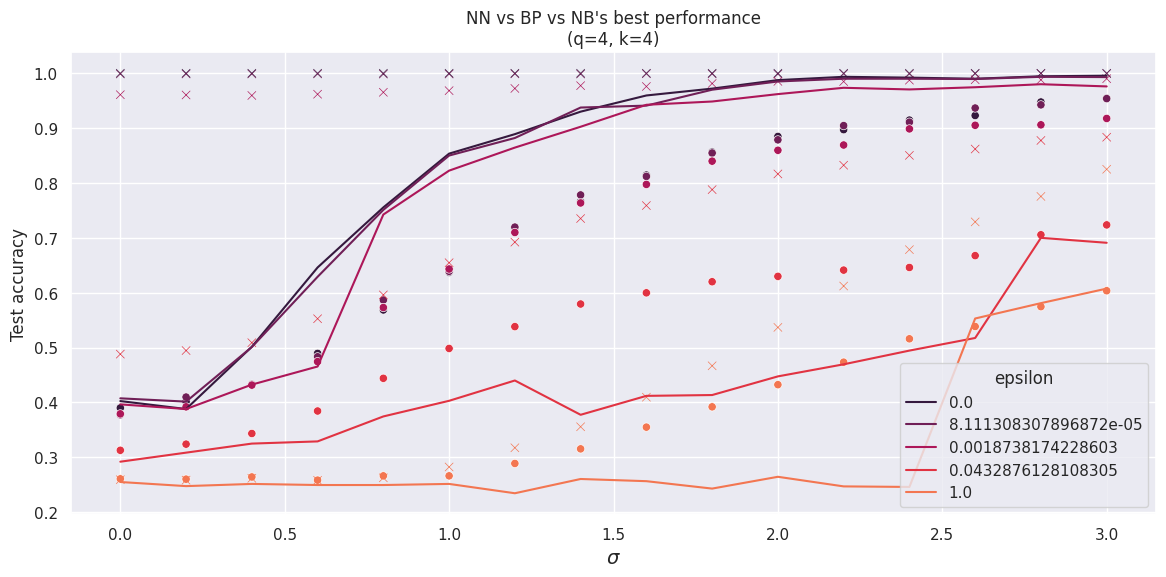

In [11]:
nb_performance = 'best'

condition = (
    experiment_catalog['experiment_id'].str.contains(nb_performance)
    & (experiment_catalog['epsilon'].isin(experiment_catalog['epsilon'].unique()[::3]))
)

fig = plt.figure(figsize=(14, 6))

sns.scatterplot(
    data=experiment_catalog[condition],
    x='sigma',
    y='naive_bayes_accuracy',
    hue='epsilon',
    legend=False,
    palette=sns.color_palette("rocket", as_cmap=False)
)

sns.scatterplot(
    data=experiment_catalog[condition],
    x='sigma',
    y='bp_accuracy',
    hue='epsilon',
    legend=False,
    palette=sns.color_palette("rocket", as_cmap=False),
    marker='x'
)

sns.lineplot(
    data=experiment_catalog[condition],
    x='sigma',
    y='final_test_accuracy',
    hue='epsilon',
    palette=sns.color_palette("rocket", as_cmap=False)
)

plt.xlabel('$\sigma$', fontsize=14)
plt.ylabel('Test accuracy')
plt.title(f"NN vs BP vs NB's {nb_performance} performance\n(q=4, k=4)")

/home/moscato/miniconda3/envs/tree-language/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/moscato/miniconda3/envs/tree-language/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/moscato/miniconda3/envs/tree-language/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, "NN vs BP vs NB's best performance\n(q=4, k=4, $\\sigma$=0.0)")

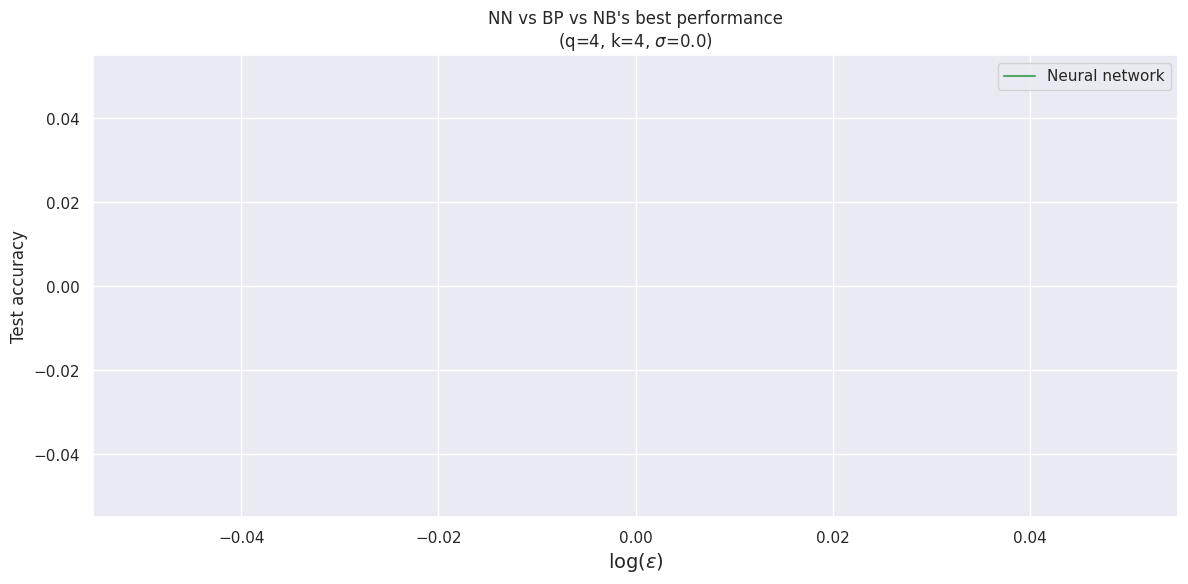

In [106]:
sigma_value = 0.

condition = (
    experiment_catalog['experiment_id'].str.contains('best')
    & (experiment_catalog['sigma'] == sigma_value)
)

fig = plt.figure(figsize=(14, 6))

sns.scatterplot(
    x=np.log(experiment_catalog[condition]['epsilon']),
    y=experiment_catalog[condition]['naive_bayes_accuracy'],
    color=sns.color_palette()[0],
    label='Naive Bayes'
)

sns.scatterplot(
    x=np.log(experiment_catalog[condition]['epsilon']),
    y=experiment_catalog[condition]['bp_accuracy'],
    color=sns.color_palette()[1],
    label='Belief propagation'
)

sns.lineplot(
    x=np.log(experiment_catalog[condition]['epsilon']),
    y=experiment_catalog[condition]['final_test_accuracy'],
    color=sns.color_palette()[2],
    label='Neural network'
)

plt.xlabel('$\log(\epsilon)$', fontsize=14)
plt.ylabel('Test accuracy')
plt.title(f"NN vs BP vs NB's best performance\n(q=4, k=4, $\sigma$={sigma_value})")

In [39]:
# condition = (
#     experiment_catalog['experiment_id'].str.contains('best')
# )

# fig = plt.figure(figsize=(14, 6))

# sns.lineplot(
#     x=experiment_catalog[condition]['sigma'],
#     y=experiment_catalog[condition]['naive_bayes_accuracy'],
#     color=sns.color_palette()[0],
#     label='Naive Bayes',
#     marker='.',
#     markersize=15
# )

# sns.lineplot(
#     x=experiment_catalog[condition]['sigma'],
#     y=experiment_catalog[condition]['bp_accuracy'],
#     color=sns.color_palette()[2],
#     label='Belief Propagation',
#     marker='.',
#     markersize=15
# )

# sns.lineplot(
#     x=experiment_catalog[condition]['sigma'],
#     y=experiment_catalog[condition]['final_test_accuracy'],
#     color=sns.color_palette()[1],
#     label='Neural Net',
#     marker='.',
#     markersize=15
# )



# plt.xlabel('$\sigma$', fontsize=14)
# plt.ylabel('Test accuracy')
# plt.title("NN vs NB's worst performance\n($q=4, k=4, \epsilon$=0)")